In [14]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn==0.9.0


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs: 
    - seaborn==0.9.0


The following packages will be REMOVED:

    anaconda:        5.1.0-py36_2         

The following packages will be UPDATED:

    ca-certificates: 2017.08.26-h94faf87_0 --> 2018.4.16-0       conda-forge
    certifi:         2018.1.18-py36_0      --> 2018.4.16-py36_0  conda-forge
    openssl:         1.0.2n-h74b6da3_0     --> 1.0.2o-hfa6e2cd_1 conda-forge
    seaborn:         0.8.1-py36h9b69545_0  --> 0.9.0-py_0        conda-forge
    vc:              14-h0510ff6_3         --> 14.1-h0510ff6_3              
    vs2015_runtime:  14.0.25123-3          --> 15.5.2-3                     

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... failed
Rolling back transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.9

Please update conda by running

    $ conda update -n base conda


ERROR conda.core.link:_execute(481): An error occurred while uninstalling package 'defaults::anaconda-5.1.0-py36_2'.
PermissionError(13, 'Access is denied')
Attempting to roll back.


PermissionError(13, 'Access is denied')




In [1]:
#load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.style.use('ggplot')


In [2]:
#load data

train = pd.read_csv('I:/Python Scripts/DataDriven/Predict Blood donations/Training.csv', index_col = 0 )

test = pd.read_csv('I:/Python Scripts/DataDriven/Predict Blood donations/Test.csv' , index_col = 0 )
                    

In [5]:
# eerste inzichten

print(train.describe())

print(train.info())

       Months since Last Donation  Number of Donations  \
count                  576.000000           576.000000   
mean                     9.439236             5.427083   
std                      8.175454             5.740010   
min                      0.000000             1.000000   
25%                      2.000000             2.000000   
50%                      7.000000             4.000000   
75%                     14.000000             7.000000   
max                     74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  \
count                   576.000000                   576.000000   
mean                   1356.770833                    34.050347   
std                    1435.002556                    24.227672   
min                     250.000000                     2.000000   
25%                     500.000000                    16.000000   
50%                    1000.000000                    28.000000   
75%     

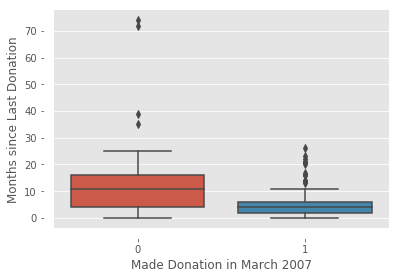

In [6]:
#visual EDA

#Boxplot
sns.boxplot(x='Made Donation in March 2007', y = 'Months since Last Donation', data = train)

sns.despine(offset = 10, trim = True)

# mensen die een donatie hebben gedaan, hebben minder maanden een laatste donatie gedaan, logisch natuurlijk

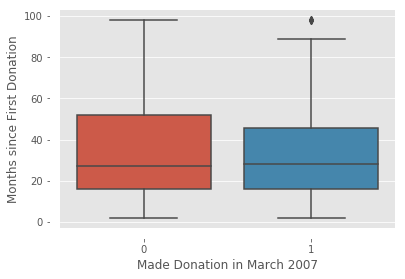

In [7]:
#visual EDA

#Boxplot
sns.boxplot(x='Made Donation in March 2007', y = 'Months since First Donation', data = train)

sns.despine(offset = 10, trim = True)


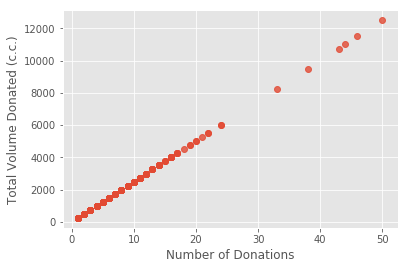

In [20]:


sns.despine(f, left=True, bottom = True)

sns.regplot(x = 'Number of Donations', y = 'Total Volume Donated (c.c.)',
                data = train, fit_reg = False)

In [23]:
y = train['Made Donation in March 2007'] .values
X = train.drop('Made Donation in March 2007', axis = 1).values

#create hyperparamater grid
c_space = np.logspace(-10, 8, 30)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

#instantiate log reg classifier
logreg = LogisticRegression()

#create train/test split on train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2018)

#GridSearchCV
logreg_cv = GridSearchCV(logreg,  param_grid = param_grid , cv = 10)


# Fit it to the training data
logreg_cv.fit(X_train, y_train,)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_pred_probs = logreg_cv.predict_proba(X_test)
score = log_loss(y_test, y_pred_probs)
print("Tuned Logistic Regression Log loss: {}".format(score))

Tuned Logistic Regression Parameter: {'C': 0.04893900918477499, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7478260869565218
Tuned Logistic Regression Log loss: 0.4570576763532401


In [24]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability =True))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =2018)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv = 10)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
y_pred_probs = cv.predict_proba(X_test)
score = log_loss(y_test, y_pred_probs)
print("Tuned SVM Log loss: {}".format(score))

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted

Tuned SVM Log loss: 0.4757078267524638
Accuracy: 0.8311688311688312
             precision    recall  f1-score   support

          0       0.85      0.96      0.90       183
          1       0.68      0.35      0.47        48

avg / total       0.81      0.83      0.81       231

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
# Logistic Regression heeft hogere log loss

Prediction = cv.predict_proba(test)

NameError: name 'test_values' is not defined

In [26]:
test_reindex = test.reset_index()

test_reindex['Prediction'] = cv.predict_proba(test)[:,1]

Submission = test_reindex.loc[:,['index', 'Prediction']]

In [30]:
Submission = Submission.rename(columns = {'Prediction':'Made Donation in March 2007'})

Submission.to_csv('I:/Python Scripts/DataDriven/Predict Blood donations/Submission.csv', index = False)